In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13453370529455795196
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5750390784
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10938223191340956587
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


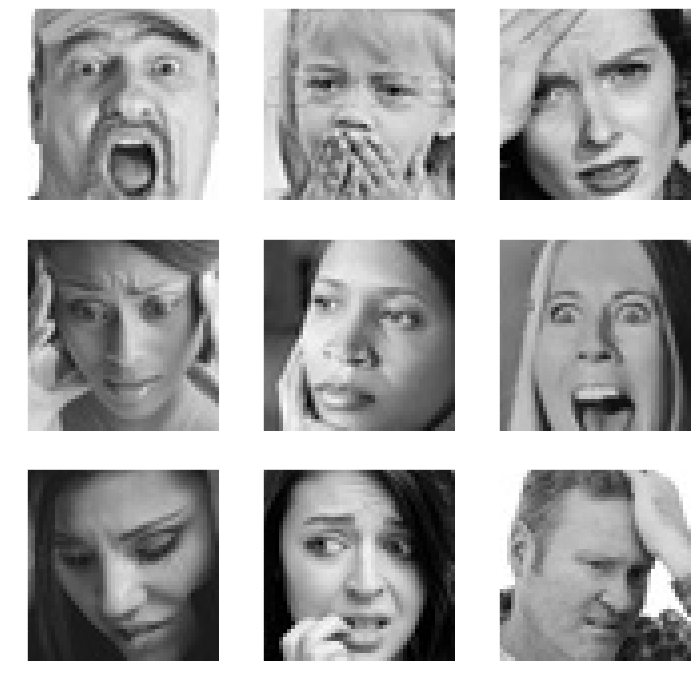

In [3]:
import os
picture_size = 48
folder_path = "archive/images/"
expression = 'fear'
plt.style.use('dark_background')
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path +"train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img) 
plt.show()



In [4]:
batch_size = 128
datagen = ImageDataGenerator(
        rotation_range=10, # rotation
        rescale = 1./255,
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2])
        #featurewise_center=True,
        #zca_whitening=True)

datagen_test = ImageDataGenerator(rescale = 1./255)
            #featurewise_center=True,
            #zca_whitening=True)

train_set = datagen.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)
test_set = datagen_test.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [5]:
no_of_classes = 7
model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [6]:
epochs = 50
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,#callbacks=callbacks_list
                                )

Epoch 1/50


C:\Users\subhr\AppData\Local\Temp\ipykernel_1560\2682527623.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


225/225 [==============================] - 19s 70ms/step - loss: 2.0833 - accuracy: 0.2004 - val_loss: 1.8371 - val_accuracy: 0.2595
Epoch 2/50
225/225 [==============================] - 15s 66ms/step - loss: 1.9564 - accuracy: 0.2161 - val_loss: 1.8182 - val_accuracy: 0.2604
Epoch 3/50
225/225 [==============================] - 15s 67ms/step - loss: 1.9215 - accuracy: 0.2204 - val_loss: 1.7961 - val_accuracy: 0.2608
Epoch 4/50
225/225 [==============================] - 15s 68ms/step - loss: 1.8982 - accuracy: 0.2211 - val_loss: 1.7879 - val_accuracy: 0.2754
Epoch 5/50
225/225 [==============================] - 15s 66ms/step - loss: 1.8890 - accuracy: 0.2275 - val_loss: 1.7810 - val_accuracy: 0.2693
Epoch 6/50
225/225 [==============================] - 15s 68ms/step - loss: 1.8784 - accuracy: 0.2298 - val_loss: 1.7733 - val_accuracy: 0.2807
Epoch 7/50
225/225 [==============================] - 15s 66ms/step - loss: 1.8669 - accuracy: 0.2325 - val_loss: 1.7687 - val_accuracy: 0.2786
Epo

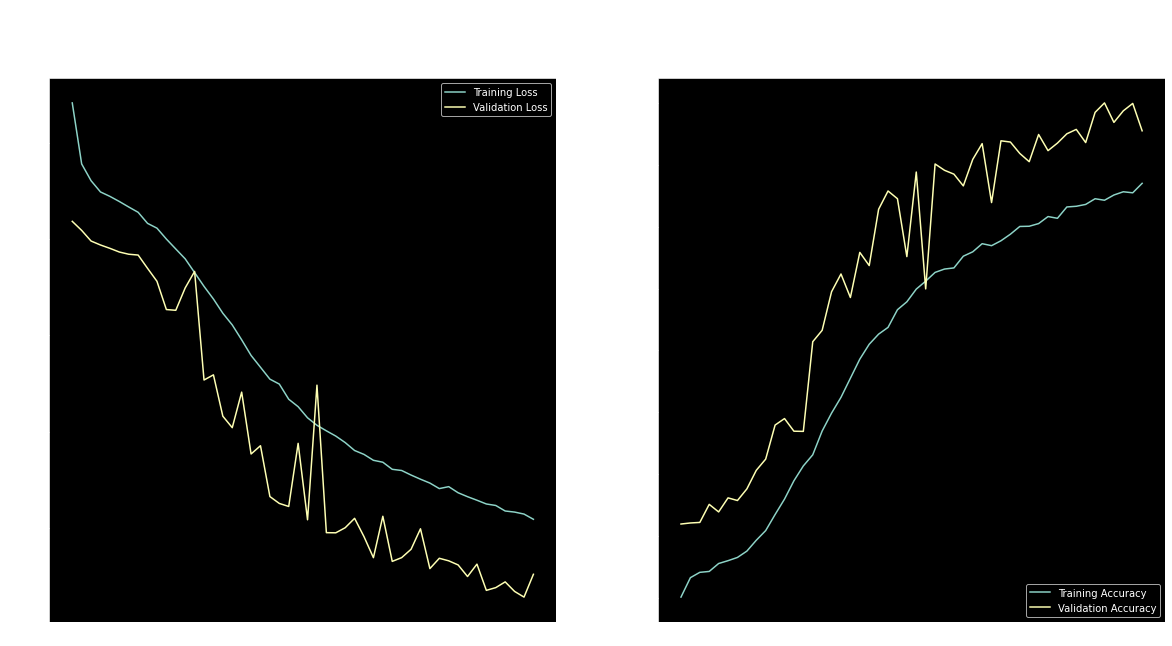

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [8]:
model.save('test_model/model')



INFO:tensorflow:Assets written to: test_model/model\assets


INFO:tensorflow:Assets written to: test_model/model\assets


In [14]:
model = keras.models.load_model('test_model/model')

In [15]:
input_shape_model = tuple([int(x) for x in model.input.shape[1:]])
input_shape_model

(48, 48, 1)

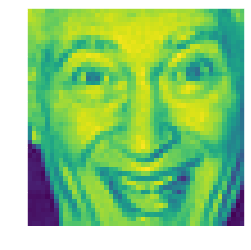

In [16]:
test_img = load_img(folder_path+"validation/happy/"+"333.jpg",grayscale=True)
plt.imshow(test_img)

In [17]:
X_train = np.array(test_img)/255.
#.reshape((-1,) + input_shape_model)
X_train.shape
a3d = np.expand_dims(X_train, axis=2)
X_test = np.array(a3d).reshape((-1,) + input_shape_model)
X_test.shape

(1, 48, 48, 1)

In [12]:
#gen = datagen_test.flow(X_test)

In [19]:
pred = model.predict(X_test)
labels = list(train_set.class_indices.keys())
classes = labels[pred.argmax()]
print(classes)

1/1 [==============================] - 0s 16ms/step
surprise


In [22]:
import pickle
with open('labels.pkl', 'wb') as f:
    pickle.dump(labels, f)